Batches:   0%|          | 0/3082 [00:00<?, ?it/s]

(98596, 384)
(98596, 2)


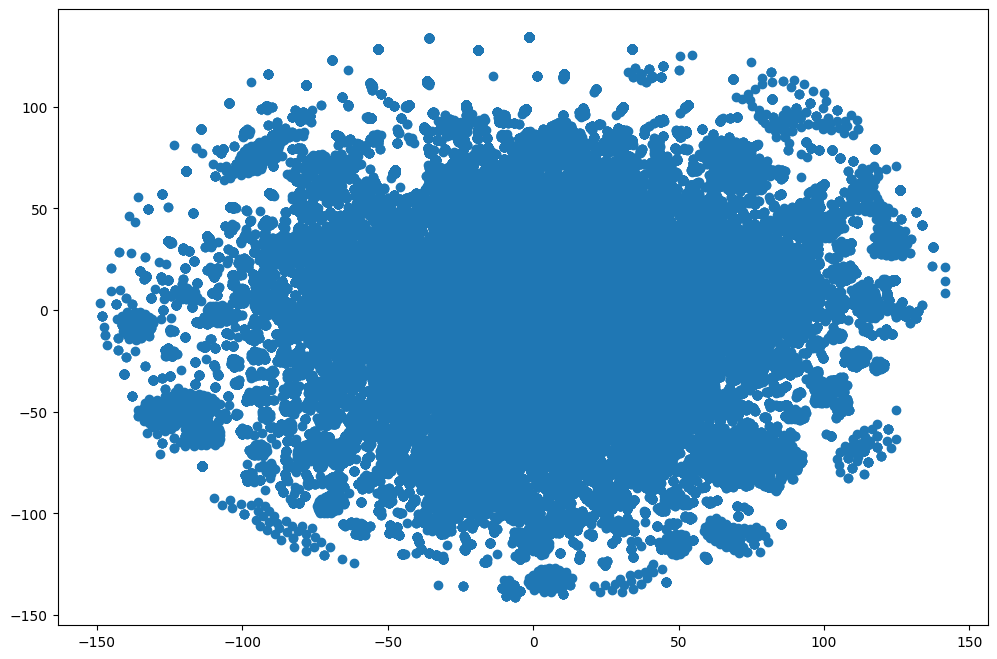

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import json
import re
from datasets import load_dataset

# Load data
filename = "promptset"
dataset = load_dataset("pisterlabs/promptset")["train"]["prompts"]
strings = []
for prompt in dataset:
    strings.extend(prompt)

# Step 1: Generate Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(strings, show_progress_bar=True)
embeddings = np.array(embeddings)
print(embeddings.shape)

# Step 2: Reduce Dimensionality with t-SNE
tsne = TSNE(n_components=2)
embeddings_reduced = tsne.fit_transform(embeddings)
print(embeddings_reduced.shape)

# Step 3: Plotting
x_coords = embeddings_reduced[:, 0]
y_coords = embeddings_reduced[:, 1]
plt.figure(figsize=(12, 8))
plt.scatter(x_coords, y_coords)

In [3]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Initialize the list to hold the within-cluster sum of square values
# wcss = []

# # We might want to test a range of k values; I'll choose from 1 to 15
# k_clusters = range(1, 50, 2)
# for i in k_clusters:
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
#     kmeans.fit(embeddings)
#     wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for that model
#     if i % 10 == 0:
#         print(f'Finished {i} clusters')

# # Now time to craft our plot with elbow grease
# plt.figure(figsize=(12, 8))
# plt.plot(k_clusters, wcss, marker='o', linestyle='--')

# # Let's make it look top-notch, follow the material design principles for crisp visuals
# plt.title('Elbow Method to Determine Optimal Cluster Count')
# plt.xlabel('Number of clusters (k)')
# plt.xticks(k_clusters)
# plt.ylabel('Within-cluster Sum of Squares (WCSS)')
# plt.grid(True, which='both', linestyle='--', linewidth=0.7)
# plt.minorticks_on()
# plt.savefig(f"images/{filename}_elbow.png")
# plt.show()

/tmp/ipykernel_3657/3551492385.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap('turbo', k_optimal)  # 'tab10' provides nice distinct colors


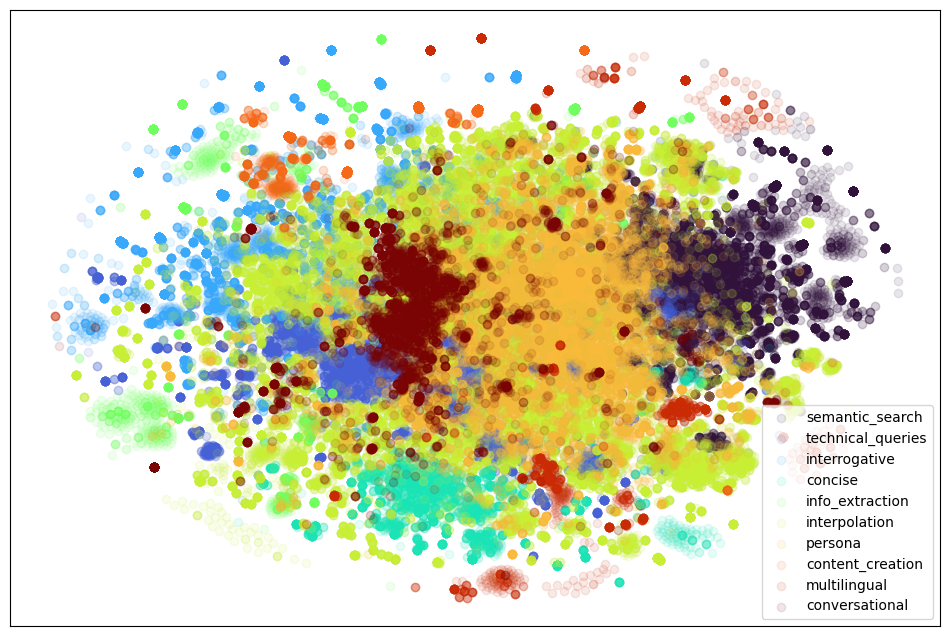

In [4]:
# Let's assume k_optimal is the optimal cluster count we selected from the elbow plot
k_optimal = 10  # Replace this with the actual optimal number of clusters you have observed
labels = ["semantic_search", "technical_queries", "interrogative", "concise", "info_extraction", "interpolation", "persona", "content_creation", "multilingual", "conversational"]

# Now run the K-Means algorithm with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=1000, n_init=10, random_state=0)
cluster_labels = kmeans_optimal.fit_predict(embeddings)

# Then we visualize using a palette that has a nice variety of distinct colors
palette = plt.cm.get_cmap('turbo', k_optimal)  # 'tab10' provides nice distinct colors
plt.figure(figsize=(12, 8))

# Scatter plot with color coding for each cluster
for i in range(k_optimal):
    plt.scatter(x_coords[cluster_labels == i], y_coords[cluster_labels == i], label=labels[i], c=[palette(i)], alpha=.1)

# Shining the spotlight on good design – a must for great UX
# plt.title('t-SNE Visualization of Sentence Embeddings with K-Means Clustering')
# plt.xlabel('t-SNE axis 1')
# plt.ylabel('t-SNE axis 2')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

# Add that crisp legend, positioned so it doesn’t smudge our plot
plt.legend()

# And display!
plt.savefig(f"images/{filename}_clusters.png")
plt.show()

In [5]:
# Make cluster to prompt map
cluster_to_prompt = {}
for i in range(k_optimal):
    cluster_to_prompt[i] = []
    for j in range(len(strings)):
        if cluster_labels[j] == i:
            cluster_to_prompt[i].append(strings[j])

# Save cluster to prompt map
import json
with open(f'data/cluster_to_prompt_{filename}.json', 'w') as f:
    json.dump(cluster_to_prompt, f)